### Задание:
    
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. 
Оцените качество модели с помощью трех подходящих для задачи метрик.

5. Постройте модель и оцените качество модели с использованием кросс-валидации. 
Проведите эксперименты с тремя различными стратегиями кросс-валидации.

6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. 
Сравните качество полученной модели с качеством модели, полученной в пункте 4.

8. Постройте кривые обучения и валидации.

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")

### 1. Выберите набор данных (датасет) для решения задачи классификации или регресии.

In [127]:
# загружаем датасет
data=pd.read_csv('DOW30.csv', sep=",")

In [128]:
# размер набора данных
data.shape

(2448, 14)

In [129]:
# типы колонок
data.dtypes

Date             object
LABEL             int64
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
InterestRate    float64
ExchangeRate    float64
VIX             float64
Gold            float64
Oil             float64
TEDSpread       float64
EFFR            float64
dtype: object

In [130]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Date            0
LABEL           0
Open            0
High            0
Low             0
Close           0
Volume          0
InterestRate    0
ExchangeRate    0
VIX             0
Gold            0
Oil             0
TEDSpread       0
EFFR            0
dtype: int64

In [131]:
data.head()

,Date,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,2008/4/1,0,12266.63965,12659.82031,12266.46973,12654.36035,295530000.0,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,2008/4/2,1,12651.66992,12696.29004,12555.16992,12608.91992,232760000.0,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,2008/4/3,0,12605.83008,12675.12012,12527.75000,12626.03027,183870000.0,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,2008/4/4,1,12626.03027,12688.48047,12528.16016,12609.41992,181260000.0,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,2008/4/7,0,12612.58984,12733.66016,12583.28027,12612.42969,198070000.0,1.62,1.5713,22.42,914.70,108.91,1.28,2.24


### 2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

In [132]:
le=LabelEncoder()
le.fit(data.Date)
data['Date']=le.transform(data.Date)

In [138]:
# типы колонок
data.dtypes

Date              int32
LABEL             int64
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
InterestRate    float64
ExchangeRate    float64
VIX             float64
Gold            float64
Oil             float64
TEDSpread       float64
EFFR            float64
dtype: object

### 3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

In [139]:
# Разделим выборку на обучающую и тестовую
# X_train - обучающая выборка (матрица объект-признак)
# y_train - обучающая выборка (вектор целевого признака)
# X_test - тестовая выборка (матрица объект-признак)
# y_test - тестовая выборка (вектор целевого признака)

X_train, X_test, y_train, y_test = train_test_split(
    data, data['LABEL'], test_size= 0.2, random_state= 1)

In [140]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((1958, 14), (1958,))

In [141]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((490, 14), (490,))

### 4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. 
### Оцените качество модели с помощью трех подходящих для задачи метрик.

In [142]:
# Построим базовые модели на основе метода ближайших соседей
# 2 ближайших соседа
neighbors = KNeighborsClassifier(n_neighbors=2)

In [143]:
neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [144]:
age_1 = neighbors.predict(X_test)
age_1

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [149]:
# оценка моделей с помощью метрик

# метрика accuracy 

# вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов
# точность в случае 10 ближайших соседей составляет более 97%, а точность в случае 2 ближайших соседей составляет 92%.
# показывает точность по всем классам, но точность может быть различной для различных классов.

# Доля верно предсказанных классификатором положительных и отрицательных объектов
#accuracy_score(y_test, age_1)

In [153]:
# метрика precision

# Доля верно предсказанных классификатором положительных объектов, из всех объектов, 
# которые классификатор верно или неверно определил как положительные.

# не работает precision_score(y_test, trestbps_1)
#precision_score(y_test, age_1)

In [154]:
# метрика recall (полнота)

# Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов

# не работает recall_score(y_test, trestbps_1)
#recall_score(y_test, age_1)

In [155]:
accuracy_score(y_test, age_1), \
precision_score(y_test, age_1), \
recall_score(y_test, age_1)

(0.4714285714285714, 0.4892086330935252, 0.265625)

In [173]:
median_absolute_error(y_test, age_1)

1.0

In [174]:
r2_score(y_test, age_1)

-1.118556356837607

### 5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.

In [156]:
# стратегия K-fold
strategy_Kfold = cross_val_score(KNeighborsClassifier(), data, data['LABEL'], 
                        cv = KFold(n_splits=3))
strategy_Kfold

array([0.50367647, 0.4877451 , 0.48406863])

In [157]:
# ShuffleSplit
# Генерируется N случайных перемешиваний данных, в каждом перемешивании заданная доля помещается в тестовую выборку
strategy_ShuffleSplit = cross_val_score(KNeighborsClassifier(), data, data['LABEL'], 
                                        cv = ShuffleSplit(n_splits=5, test_size=0.25))

strategy_ShuffleSplit

array([0.49346405, 0.49346405, 0.49673203, 0.49836601, 0.49836601])

In [158]:
# StratifiedKFold
strategy_StratifiedKFold = cross_val_score(KNeighborsClassifier(), data, data['LABEL'], 
                                        cv = StratifiedKFold(n_splits=3))

strategy_StratifiedKFold

array([0.50917993, 0.49019608, 0.48834356])

### 6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [159]:
n_range = np.array(range(1,70,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
         52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
         69])}]

In [160]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, 
                      cv = StratifiedKFold(n_splits=3), scoring='accuracy')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  2, ..., 68, 69])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [161]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 66}

### 7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.

In [162]:
# Построим базовые модели на основе метода ближайших соседей
# 2 ближайших соседа
neighbors2 = KNeighborsClassifier(n_neighbors=66)

In [163]:
neighbors2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=66, p=2,
           weights='uniform')

In [164]:
age_2 = neighbors2.predict(X_test)
age_2

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [165]:
# оценка моделей с помощью метрик
accuracy_score(y_test, age_2), \
precision_score(y_test, age_2), \
recall_score(y_test, age_2)

(0.5326530612244897, 0.5395894428152492, 0.71875)

метрики: accuracy, precision, recall

в пункте 4: 

(0.4714285714285714, 0.4892086330935252, 0.265625)

в пункте 7:

(0.5326530612244897, 0.5395894428152492, 0.71875)

### 8. Постройте кривые обучения и валидации.

In [166]:
# Построение кривых обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

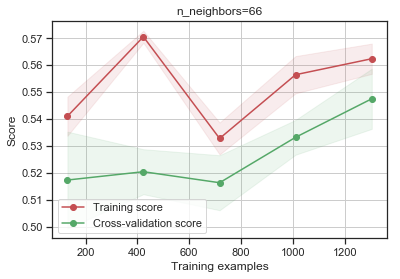

In [167]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=66), 'n_neighbors=66', 
                    X_train, y_train, cv = StratifiedKFold(n_splits=3))

In [124]:
# Построение кривой валидации
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\foruniver\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

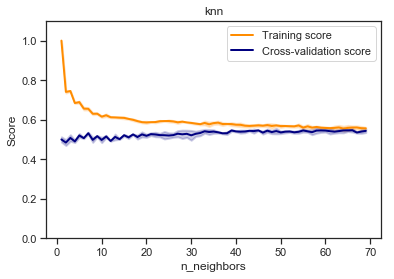

In [125]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv = StratifiedKFold(n_splits=3), scoring="accuracy")